In [5]:
#MAIN TEST FILE
#reading whole images


import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os

path = "dataset"
ext = [".jpeg", ".jpg", ".png"]
numOfContours=0

#getting all filenames in a folder
fileNameExtList = []
fileNameOnlyList = []
for file in os.listdir(path):
    if file.endswith(tuple(ext)):
        fileNameExtList.append(file)
        #print(os.path.join(path, file)) #== 'symptoms/11085_left.jpeg'
        fileName, extension = os.path.splitext(file)
        fileNameOnlyList.append(fileName)

#ROI manual specs
x = 65
y = 65
w = 300
h = 190

#writing to a csv file
csvTitle = [['image_name', 'count', 'area']]
csvData = []

contourThreshold = 5

for fileName in fileNameExtList:
    img = cv2.imread(os.path.join(path,fileName))    #reading an image
    img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
    #cv2.imshow('orginal', img_rs)
    print(fileName)
    
    imCrop = img_rs[y:y+h, x:x+w]
    #cv2.imshow("Image", imCrop)
    
    hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    clr_rng_img = cv2.inRange(hsv_im,(19,0,250), (255,255,255)) 
    #cv2.imshow('color range orginal', clr_rng_img);    
    
    #contour drawing test code
    image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    numOfContours1 = len(contours)   #number of contours
    
    if numOfContours1 > contourThreshold:
        #19,0, 111
        clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
        #contour drawing test code
        image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        numOfContours = len(contours)   #number of contours
    
    
        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)
        #cv2.imshow("Bounding box",imCrop)

        csvData.append([fileName, numOfContours, sumOfArea])
   
    else:

        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        
        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)

        csvData.append([fileName, numOfContours, sumOfArea])
        
        
with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created
    
    
    
    
    
    


11730_right.jpeg
('contours = ', 56)
('max area = ', 775)
('sum of Area =', 1160)
12859_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
15439_left.jpeg
('contours = ', 56)
('max area = ', 408)
('sum of Area =', 26)
15383_right.jpeg
('contours = ', 56)
('max area = ', 1612)
('sum of Area =', 2)
1313_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
1313_left.jpeg
('contours = ', 56)
('max area = ', 713)
('sum of Area =', 728)
12329_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
1449_left.jpeg
('contours = ', 56)
('max area = ', 48)
('sum of Area =', 42)
1502_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
15415_left.jpeg
('contours = ', 56)
('max area = ', 903)
('sum of Area =', 18)
12306_left.jpeg
('contours = ', 56)
('max area = ', 25)
('sum of Area =', 1)
12149_left.jpeg
('contours = ', 56)
('sum of Area =', 0)
15397_right.jpeg
('contours = ', 56)
('max area = ', 1050)
('sum of Area =', 112)
12878_left.jpeg
('contours = ', 56)
('max area = ', 224)
('sum of Area =', 39)

11698_left.jpeg
('contours = ', 63)
('max area = ', 13490)
('sum of Area =', 3122)
12290_left.jpeg
('contours = ', 63)
('sum of Area =', 0)
1449_right.jpeg
('contours = ', 63)
('sum of Area =', 0)
1324_left.jpeg
('contours = ', 63)
('max area = ', 256)
('sum of Area =', 31)
1432_right.jpeg
('contours = ', 63)
('sum of Area =', 0)
15418_right.jpeg
('contours = ', 63)
('sum of Area =', 0)
12630_right.jpeg
('contours = ', 63)
('sum of Area =', 0)
15435_left.jpeg
('contours = ', 18)
('max area = ', 528)
('sum of Area =', 439)
12114_left.jpeg
('contours = ', 18)
('max area = ', 80)
('sum of Area =', 25)
12445_right.jpeg
('contours = ', 18)
('sum of Area =', 0)
11724_left.jpeg
('contours = ', 18)
('max area = ', 104)
('sum of Area =', 0)
12227_left.jpeg
('contours = ', 18)
('max area = ', 81)
('sum of Area =', 4)
1506_left.jpeg
('contours = ', 18)
('sum of Area =', 0)
15415_right.jpeg
('contours = ', 18)
('max area = ', 598)
('sum of Area =', 1)
15443_right.jpeg
('contours = ', 18)
('max are

In [6]:
#TEST 01
#trying to write to csv file
#training the above code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


data=pd.read_csv("dr_features.csv")
data_new=pd.read_csv("dr_features.csv")

predictions=data_new['count']
#data_new

threshold = 30
data_new['pred_value'] = predictions.apply(lambda x: 1 if x > threshold else 0)


features_raw = data_new[[ "count", "area"]]
predict_class = data_new['pred_value']


#writing to csv file
count=0
with open('dr_features.csv','r') as csvinput:
    with open('dr_features_output.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)

        all = []
        row = next(reader)
        row.append('pred_values')
        all.append(row)

        for row in reader:
            row.append(predict_class[count])
            count = count + 1
                           
            all.append(row)

        writer.writerows(all)



        
        

Training set has 156 samples.
Testing set has 40 samples.
[1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0
 0 1 0]
[[15  4]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.83      0.95      0.89        21

   micro avg       0.88      0.88      0.88        40
   macro avg       0.89      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40

('Accuracy is', 0.875)


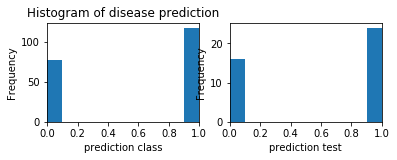

In [14]:
#training the model with above generated csv file

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data=pd.read_csv("dr_features_output_main.csv")
data_new=pd.read_csv("dr_features_output_main.csv")

predictions=data_new['count']
#data_new

threshold = 30
#data_new['pred_value'] = predictions.apply(lambda x: 1 if x > threshold else 0)
#data_new['pred_value00'] = data_new['pred_value']


features_raw = data_new[[ "count", "area"]]
predict_class = data_new['pred_values']


from sklearn.model_selection import train_test_split


np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(features_raw, predict_class, train_size=0.80, random_state=1)
#train_size is set to .10 not .80 for less accuracy measure

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


import sklearn
from sklearn import svm

C = 5
# Create SVM classification object 
#svc = svm.SVC(kernel='linear',C=C,gamma=2)
svc = svm.SVC(kernel='linear',C=C,gamma=2)

svc.fit(X_train, y_train)


from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
print(predictions_test)


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_test))
print(classification_report(y_test, predictions_test))


plt.subplot(221), plt.hist(predict_class, bins=10)
plt.xlim(0,1)
plt.title('Histogram of disease prediction')
plt.xlabel('prediction class')
plt.ylabel('Frequency')

plt.subplot(222), plt.hist(predictions_test, bins=10)
plt.xlim(0,1)
plt.xlabel('prediction test')
plt.ylabel('Frequency')

print('Accuracy is',metrics.accuracy_score(y_test,predictions_test))



In [13]:
#TEST 02
#Same above code
#for test a single image value


import cv2 as cv2   #importing opevcv
import os
import numpy as np


predictions=data_new['count']
#data_new

numOfContours=0


#start test code

imgPath = raw_input("enter path/name.ext of the image")

img = cv2.imread(os.path.join(imgPath))    #reading an image
img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
#cv2.imshow('orginal', img_rs)
    
#ROI manual specs
x = 65
y = 65
w = 300
h = 190

imCrop = img_rs[y:y+h, x:x+w]
#cv2.imshow("Image", imCrop)
hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    
clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
#contour drawing test code
image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
numOfContours = len(contours)   #number of contours
    
#print("contours = ",numOfContours)
area1 = []
sumOfArea = 0 
for contour in contours:
    x1,y1,w1,h1 = cv2.boundingRect(contour)
    cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
    area1.append(w1*h1)

    try:
        maxArea = max(area)
        #print("max area = ", maxArea)
    except:
        maxArea = 0
    try:
        area11.remove(maxArea)
    except:
        maxArea = 0
    
    sumOfArea = sum(area1)
    #print("sum of Area =",sumOfArea)
    #v2.imshow("Bounding box",imCrop)

print(sumOfArea)
print(numOfContours)
input_data = pd.DataFrame([[numOfContours, sumOfArea]])

print(input_data)
#End test cod




predictions_test = svc.predict(input_data)
print(predictions_test)

if(predictions_test):
    print("The patient is DIABETIC")
else:
    print("NOT DIABETIC")



    
#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created
    
    
    


enter path/name.ext of the imagetest_dataset/nosymptoms/149_left.jpeg
17
8
   0   1
0  8  17
[0]
NOT DIABETIC
